In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-houseprice-data/boston.csv


# Variance Threshhold****

In [2]:
import pandas as pd

In [3]:
data = pd.DataFrame({"A":[1,2,4,1,2,4], "B":[4,5,6,7,8,9], "C":[0,0,0,0,0,0], "D":[1,1,1,1,1,1]})


In [4]:
data

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1
5,4,9,0,1


In [5]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold 


In [6]:
var_thres=VarianceThreshold(threshold=0) 




In [7]:
var_thres.fit(data) 

VarianceThreshold(threshold=0)

In [8]:
var_thres.get_support() 



array([ True,  True, False, False])

In [9]:
data.columns[var_thres.get_support()]


Index(['A', 'B'], dtype='object')

In [10]:
constant_columns = [column for column in data.columns
if column not in data.columns[var_thres.get_support()]]
print(constant_columns)

['C', 'D']


# Correlation

In [11]:
#importing libraries
from sklearn.datasets import load_boston



In [12]:
 import pandas as pd 

In [13]:
#Loading the dataset 
data = load_boston() 
df = pd.DataFrame(data.data, columns = data.feature_names) 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
df["MEDV"] = data.target
X = df.drop("MEDV",axis=1)


In [16]:
 #Feature Matrix
y = df["MEDV"] 


In [17]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0) 


In [18]:
X_train.corr() 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


In [19]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr 	

In [20]:
corr_features = correlation(X_train, 0.7)
corr_features


{'AGE', 'DIS', 'NOX', 'TAX'}

In [21]:
#dropping correlated features
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)


,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4.0,18.4,396.90,4.54


# Mutual Information Classification

In [22]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')


In [23]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [24]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),    df['Wine'], test_size=0.3, random_state=0)


In [25]:
from sklearn.feature_selection import mutual_info_classif


In [26]:
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)


In [27]:
mutual_info

array([0.42923984, 0.2985087 , 0.12581323, 0.24321781, 0.19711724,
       0.47421281, 0.71671759, 0.10419388, 0.26429698, 0.6191771 ,
       0.55447595, 0.55648892, 0.54773273])

In [28]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


Flavanoids              0.716718
Color.int               0.619177
OD                      0.556489
Hue                     0.554476
Proline                 0.547733
Phenols                 0.474213
Alcohol                 0.429240
Malic.acid              0.298509
Proanth                 0.264297
Acl                     0.243218
Mg                      0.197117
Ash                     0.125813
Nonflavanoid.phenols    0.104194
dtype: float64

In [29]:
from sklearn.feature_selection import SelectKBest


In [30]:
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]


Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

# Mutual Information Regression

In [31]:
housing_df=pd.read_csv('../input/the-boston-houseprice-data/boston.csv')



In [32]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


In [33]:
numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)


In [34]:
housing_df=housing_df[numerical_cols]

In [35]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [36]:
### It is always a good practice to split train and test data to avoid #overfitting
from sklearn.model_selection import train_test_split


In [37]:
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop(labels=['MEDV'], axis=1), housing_df['MEDV'], test_size=0.3, random_state=0)


In [38]:
from sklearn.feature_selection import mutual_info_regression


In [39]:
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)


In [40]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


LSTAT      0.649877
RM         0.594755
INDUS      0.530546
PTRATIO    0.498705
NOX        0.444270
TAX        0.373108
AGE        0.337325
CRIM       0.330988
DIS        0.311147
RAD        0.205312
ZN         0.200177
B          0.170754
CHAS       0.021480
dtype: float64

In [41]:
from sklearn.feature_selection import SelectPercentile


In [42]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)
X_train.columns[selected_top_columns.get_support()]


Index(['INDUS', 'RM', 'LSTAT'], dtype='object')

# CHI Square

In [43]:
import seaborn as sns
df=sns.load_dataset('titanic')


In [44]:

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
##['sex','embarked','alone','pclass','Survived']
df = df[['sex','embarked','alone','pclass','survived']]

In [46]:
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [47]:
import numpy as np

In [48]:
### Let's perform label encoding
df['sex']=np.where(df['sex']=="male",1,0)


In [49]:
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)


In [50]:
df['alone']=np.where(df['alone']==True,1,0)


In [51]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [52]:
### train Test split is usually done to avaoid overfitting
from sklearn.model_selection import train_test_split


In [53]:
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']], df['survived'],test_size=0.3,random_state=100)


In [54]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)


In [55]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns


In [56]:
p_values




sex         5.306038e-16
embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64

In [57]:
p_values.sort_index(ascending=False)

sex         5.306038e-16
pclass      2.755149e-06
embarked    5.999221e-03
alone       9.696105e-04
dtype: float64

# PCA Principal Component Analysis

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline


In [59]:
from sklearn.datasets import load_breast_cancer


In [60]:
cancer=load_breast_cancer()



In [61]:
cancer.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [62]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [63]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])


In [64]:
from sklearn.preprocessing import StandardScaler


In [65]:
scaler=StandardScaler()


In [66]:
scaler.fit(df)


StandardScaler()

In [67]:
scaled_data=scaler.transform(df)


In [68]:
from sklearn.decomposition import PCA


In [69]:
pca=PCA(n_components=2) 	


In [70]:
pca.fit(scaled_data)


PCA(n_components=2)

In [71]:
x_pca=pca.transform(scaled_data)


In [72]:
x_pca


array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0, 0.5, 'Second principle component')

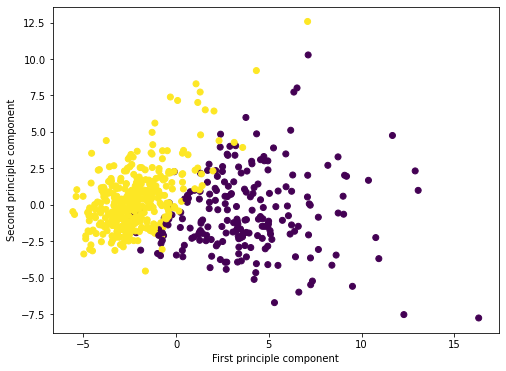

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
